In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.cluster import KMeans


In [40]:
import cv2
import glob

images = [cv2.imread(file) for file in glob.glob('posters_test/*.jpg')]
images

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  2,   0,   0],
         [  2,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[ 33,  13,   8],
         [ 14,   3,   0],
         [  0,   1,   0],
         ...,
         [108,   2, 253],
         [106,   1, 252],
         [104,   1, 252]],
 
        [[ 15,   4,   0],
         [  5,   0,   0],
         [  0,   1,   0],
         ...,
         [105,   0, 251],
         [105,   0, 251],
         [103,   0, 251]],
 
        [[  0,   1,   0],
         [  0,   1,   0],
         [  0,   2,   2],
         ...,
         [105,   0, 251],
  

1


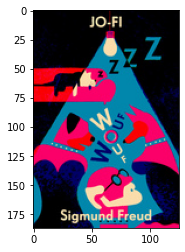

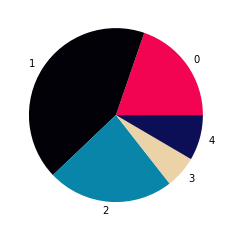

[[243   4  82]
 [  2   1   7]
 [  8 133 169]
 [235 210 167]
 [ 13  15  86]]
2


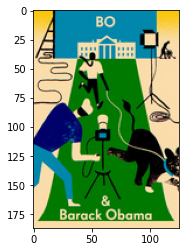

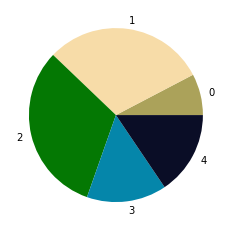

[[171 162  90]
 [247 220 168]
 [  4 120   3]
 [  5 134 170]
 [ 10  13  38]]
3


C:\Users\Kirill\AppData\Local\Temp/ipykernel_19308/4289766292.py:28: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))


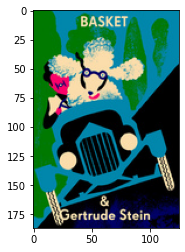

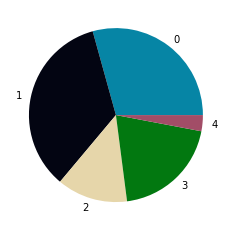

[[  6 133 165]
 [  3   5  18]
 [230 214 170]
 [  2 120  16]
 [162  77 103]]


In [68]:
import csv
header = ['red_1', 'green_1', 'blue_1', 'red_2', 'green_2', 'blue_2',
                 'red_3', 'green_3', 'blue_3','red_4', 'green_4', 'blue_4',
                 'red_5', 'green_5', 'blue_5']
kmeans=KMeans(n_clusters=5)
step=1;
temp=[];
for img in images: 
    plt.figure() 
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    print(step);
    step=step+1
    img=img.reshape((img.shape[1]*img.shape[0],3))

    
    s=kmeans.fit(img)
    labels=kmeans.labels_
    centroid=kmeans.cluster_centers_
    labels=list(labels)
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    plt.figure()
    plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    plt.show()
    rounded_centroids=np.round(centroid)
    r=rounded_centroids.astype(int)
    print(r)
    
    data = [
    {
        'red_1':r[0,0], 'green_1':r[0,1], 'blue_1':r[0,2],
        'red_2':r[1,0], 'green_2':r[1,1], 'blue_2':r[1,2],
        'red_3':r[2,0], 'green_3':r[2,1], 'blue_3':r[2,2],
        'red_4':r[3,0], 'green_4':r[3,1], 'blue_4':r[3,2],
        'red_5':r[4,0], 'green_5':r[4,1], 'blue_5':r[4,2],
    }
    ]
    temp+=data
   
    

In [69]:
 with open('test.csv', 'w') as file:
        # Create a CSV dictionary writer and add the student header as field names
        writer = csv.DictWriter(file, fieldnames=header)
        # Use writerows() not writerow()
        writer.writeheader()
        writer.writerows(temp)
import pandas as pd
pd.read_csv('test.csv') 

,red_1,green_1,blue_1,red_2,green_2,blue_2,red_3,green_3,blue_3,red_4,green_4,blue_4,red_5,green_5,blue_5
0,243,4,82,2,1,7,8,133,169,235,210,167,13,15,86
1,171,162,90,247,220,168,4,120,3,5,134,170,10,13,38
2,6,133,165,3,5,18,230,214,170,2,120,16,162,77,103
